<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_7_1_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

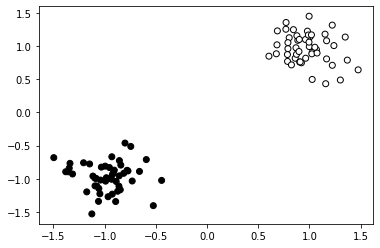

In [ ]:
import torch
from torch import nn
import sklearn.datasets as skds
import matplotlib.pyplot as plt
X, Y = skds.make_blobs(n_samples=100, n_features=2,
                       centers=2, random_state=1)
X = torch.tensor(X).float()
Y = torch.tensor(Y).long()
X = (X - X.mean(dim=0)) / X.std(dim=0)
plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");


In [ ]:
encoder = nn.Linear(2,1)
decoder = nn.Linear(1,2)
autoencoder = nn.Sequential(encoder, decoder)

In [ ]:
optimizer = torch.optim.SGD(autoencoder.parameters(), lr=0.1)
MSELoss   = nn.MSELoss()

In [ ]:
def iterate_epoch():
  optimizer.zero_grad()
  reconstructed_X = autoencoder(X)
  loss = MSELoss(reconstructed_X, X)
  loss.backward()
  optimizer.step()
  return loss

In [ ]:
epochs = 40
epoch_loss = torch.empty(epochs)
for epoch_idx in range(epochs):
    epoch_loss[epoch_idx] = iterate_epoch().detach()

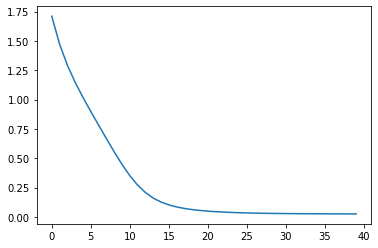

In [ ]:
plt.plot(epoch_loss);

In [ ]:
with torch.no_grad():
  reconstructed_X = autoencoder(X)
  encoded_X = encoder(X)
encoded_X.size()

torch.Size([100, 1])

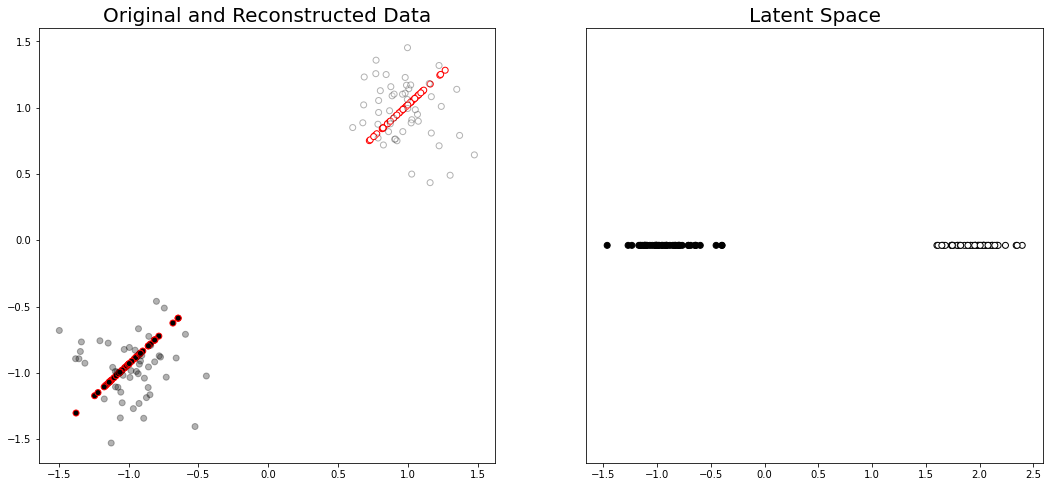

In [ ]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(18)

axes[0].scatter(reconstructed_X[:, 0], reconstructed_X[:, 1],
              c=Y, cmap="Greys", edgecolor="red", alpha=1);
axes[0].scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black", alpha=0.3);
axes[0].set_title("Original and Reconstructed Data", size=20);

axes[1].scatter(encoded_X[:, 0], torch.zeros(encoded_X.size()),
              c=Y, cmap="Greys", edgecolor="black", alpha=1); 
axes[1].axes.get_yaxis().set_visible(False) 
axes[1].set_title("Latent Space", size=20);

In [ ]:
encoded_X.size()

torch.Size([100, 1])

#Downstream tasks

In [ ]:
classifier = nn.Sequential(nn.Linear(1,2),nn.LogSoftmax(dim=1))
CE_loss    = nn.NLLLoss()
optimizer  = torch.optim.SGD(classifier.parameters(), lr=1)

In [ ]:
two_points = encoded_X[0:2,:]
target     = Y[0:2]

In [ ]:
def iterate_epoch_classifier():
  optimizer.zero_grad()
  logprobs = classifier(two_points)
  loss     = CE_loss(logprobs,target)
  loss.backward()
  optimizer.step()
  return loss

In [ ]:
epochs = 1
epoch_loss=torch.empty(epochs)
for epoch_idx in range(epochs):
    epoch_loss[epoch_idx] = iterate_epoch_classifier().detach()

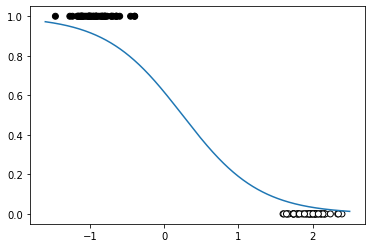

In [ ]:
with torch.no_grad():
  xline = torch.linspace(-1.6, 2.5, 1000).reshape(1000,1)
  black_prob = torch.exp(classifier(xline))[:,1]
plt.scatter(encoded_X[:, 0], torch.where(Y==1,1,0),
              c=Y, cmap="Greys", edgecolor="black", alpha=1); 
plt.plot(xline, black_prob);